# Симуляции распространения COVID-19

  Сейчас очень многие пытаются построить прогноз распространения эпидемии. В ход идут все возможные методы от умозрительных "это распределение похоже на известное нам распределение ... (Имя кого-то умного)" до классических моделей SIS\SIR\SIER. 

  Прошу не воспринимать результаты моделирования слишком серьезно. В данном случае это просто удобный повод поупражняться и продемонстрировать поведение моделей

## Умозрительная, но довольно удачная модель

В симуляции эпидемии мы базируемся на следующий сценарий:

- Появляется первый и единственный заражённый, для него запускается инкубационный период.Пока у него не появились симптомы, он ежедневно заряжает других членов общества в случайном количестве в соответствии с распределением Пуассона (коэффициент в котором зависит от коэффициента распространения вируса). Процесс для всех новых заражённых протекает одинаковым образом, стартуя с момента заражения.

- Когда инкубационный период заканчивается, у заражённого начинается активная стадия болезни, он обращается в мед. помощь и перестаёт заражать других и в этот день пополняет статистику по зафиксированным случаям.

- В какой-то момент времени (в определённый день симуляции) власти региона включают карантин, что снижает коэффициент заражения.

Инкубационный период — это характеристика воздействия вируса на человеческий организм, а значит он всегда постоянный и не может быть изменён сам по себе или какими-либо карантинными мерами. Для COVID-19 мы рассматриваем случайное значение от 1 до 14 дней.

Величина коэффициента заражения до карантина зависит от густонаселённости региона и от его социальных особенностей. А после введения карантина — от конкретики и эффективности самих мер. Данные значения могут разниться достаточно сильно между странами.

DAYS_OF_SIMULATION - количество дней в симуляции,

COEF_BASE - коэффициент дневного распространения до введения карантинных мер,

COEF_QUARANTINE - коэффициент дневного распространения после введения карантинных мер,

DAY_QUARANTINE - день введения карантинных мер с момента начала симуляции,

INCUBATION_PERIOD - верхняя грань инкубационного периода в днях (не включительно).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Для воспроизводимости результатов
np.random.seed(0)

In [ ]:
COUNTRY = " Name of Country"
DAYS_OF_SIMULATION = 366
COEF_BASE = 0.35
COEF_QUARANTINE = 0.135
DAY_QUARANTINE = 74
INCUBATION_PERIOD = 15

In [ ]:
# Здесь логика вычисления коэффициента распространения в зависимости от дня. 
# Реализовал сценарий двух разных коэффициентов: до и после введения карантина. 
# Но ничего не запрещает усложнить функцию, добавив в неё, например, 
# мягкий и жёсткий карантин в разные даты с разными коэффициентами или что-то ещё.
def get_coef(day):
    return COEF_BASE if day < DAY_QUARANTINE else COEF_QUARANTINE

In [ ]:
# Дни симуляции
days = np.arange(1, DAYS_OF_SIMULATION)

# Первый инфицированный
infected = np.random.randint(1, INCUBATION_PERIOD, 1)

In [ ]:
infected_lst = []  # Список хранит в себе дни заражённых, в которые у них проявится болезнь
new_cases_lst = []
new_cases_total_lst = []

In [ ]:
# Цикл симуляции по дням
for day in days:
    # Берём коэффициент распространения
    coef = get_coef(day)

    # Проверяем заражённых на предмет появления симптомов
    new_cases_idx = np.argwhere(infected == day).flatten()

    # Регистрируем заражённых с симптомами как новые случаи заражения
    new_cases_count = new_cases_idx.size

    # Удаляем заражённых с симптомами из списка инфицированных, способных заражать
    infected = np.delete(infected, new_cases_idx)

    # Генерируем новых заражённых в соответствии с распределением Пуассона и добавляем их к имеющимся
    new_infected_count = np.random.poisson(coef, infected.size).sum()
    new_infected = np.random.randint(1, INCUBATION_PERIOD, new_infected_count) + day
    infected = np.concatenate((infected, new_infected))

    # Заполняем статистику
    infected_lst.append(infected.size)
    new_cases_lst.append(new_cases_count)
    new_cases_total_lst.append(sum(new_cases_lst))

    print(day, infected.size)

1 1
2 3
3 3
4 4
5 6
6 4
7 5
8 4
9 5
10 7
11 6
12 7
13 5
14 5
15 5
16 4
17 4
18 5
19 5
20 3
21 5
22 8
23 8
24 6
25 5
26 6
27 6
28 9
29 13
30 13
31 12
32 13
33 16
34 19
35 21
36 26
37 28
38 31
39 36
40 47
41 54
42 69
43 84
44 107
45 134
46 159
47 212
48 265
49 320
50 406
51 506
52 622
53 754
54 969
55 1177
56 1441
57 1719
58 2093
59 2550
60 3110
61 3769
62 4581
63 5534
64 6694
65 8244
66 10023
67 12232
68 15000
69 18245
70 22312
71 27227
72 33115
73 40277
74 41326
75 42243
76 42946
77 43248
78 43311
79 43308
80 42893
81 42220
82 41380
83 40372
84 39011
85 37735
86 36541
87 35518
88 34754
89 33991
90 33189
91 32349
92 31533
93 30674
94 29882
95 29059
96 28176
97 27303
98 26628
99 26037
100 25544
101 24834
102 24250
103 23724
104 23214
105 22727
106 22085
107 21529
108 21000
109 20560
110 19975
111 19460
112 18931
113 18436
114 17845
115 17390
116 17001
117 16491
118 16146
119 15681
120 15182
121 14709
122 14386
123 14062
124 13736
125 13445
126 13150
127 12852
128 12558
129 12202
130 1183

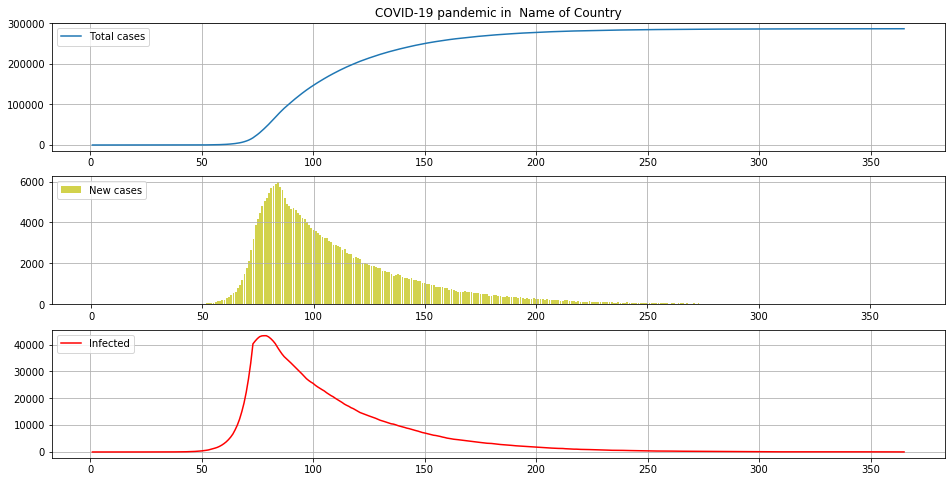

In [ ]:
plt.figure(figsize=(16, 8))

# График общего количества заражений
plt.subplot(311)
plt.title(f"COVID-19 pandemic in {COUNTRY}")
plt.plot(days, new_cases_total_lst)
plt.grid(True)
plt.legend(["Total cases"], loc='upper left')

# График новых ежедневных случаев заражения
plt.subplot(312)
plt.bar(days, new_cases_lst, alpha=0.7, color='y')
plt.grid(True)
plt.legend(["New cases"], loc='upper left')

# График ежедневного количества инфицированных
plt.subplot(313)
plt.plot(days, infected_lst, color='r')
plt.grid(True)
plt.legend(["Infected"], loc='upper left')

plt.show()

Авторы <a href="https://habr.com/ru/post/498028/">кода</a>  утверждают, что более-менее удалось смоделировать ситуации в нескольких странах:

In [ ]:
COUNTRY = "Italy"
DAYS_OF_SIMULATION = 366
COEF_BASE = 0.35
COEF_QUARANTINE = 0.135
DAY_QUARANTINE = 74
INCUBATION_PERIOD = 15

In [ ]:
COUNTRY = "USA"
DAYS_OF_SIMULATION = 366
COEF_BASE = 0.35
COEF_QUARANTINE = 0.135
DAY_QUARANTINE = 83
INCUBATION_PERIOD = 15

- Не рассматриваются случаи, когда заболевшие переносят болезнь дома, никому не сообщая,
- Не рассматриваются бессимптомные носители,
- Никак не учитывается коллективный иммунитет (а это существенно, если количество заболевших соизмеримо с величиной популяции),
- Обратившиеся за помощью автоматически выпадают из потенциальных переносчиков,
- Не учитываются постепенно вводимые меры карантина,
- … многое другое.

## SEIRD модель

<a href="https://github.com/silpara/simulators/tree/master/compartmental_models">Ссылка на источник</a>

<img width=600 src="https://content.foto.my.mail.ru/mail/a__l/17/h-74.jpg">
<img width=300 src="https://content.foto.my.mail.ru/mail/a__l/17/h-75.jpg.png">

In [ ]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import plotly.graph_objects as go
import plotly.io as pio
import requests
from lmfit import minimize, Parameters, Parameter, report_fit
pio.renderers.default = "notebook"
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
# Jupyter Specifics
from IPython.display import HTML
from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout, ToggleButton, ToggleButtons

style = {'description_width': '100px'}
slider_layout = Layout(width='99%')

In [ ]:
def ode_model(z, t, beta, sigma, gamma, mu):
    """
    Reference https://www.idmod.org/docs/hiv/model-seir.html
    """
    S, E, I, R, D = z
    N = S + E + I + R + D
    dSdt = 
    dEdt = 
    dIdt = 
    dRdt = 
    dDdt = 
    return [dSdt, dEdt, dIdt, dRdt, dDdt]

In [ ]:
def ode_solver(t, initial_conditions, params):
    initE, initI, initR, initN, initD = initial_conditions
    beta, sigma, gamma, mu = params['beta'].value, params['sigma'].value, params['gamma'].value, params['mu'].value
    initS = initN - (initE + initI + initR + initD)
    res = odeint(ode_model, [initS, initE, initI, initR, initD], t, args=(beta, sigma, gamma, mu))
    return res

Скачаем данные по COVID-19 для Индии

In [ ]:
response = requests.get('https://api.rootnet.in/covid19-in/stats/history')
print('Request Success? {}'.format(response.status_code == 200))
covid_history = response.json()['data']


Request Success? True


In [ ]:
keys = ['day', 'total', 'confirmedCasesIndian', 'confirmedCasesForeign', 'confirmedButLocationUnidentified',
        'discharged', 'deaths']
df_covid_history = pd.DataFrame([[d.get('day'), 
                                  d['summary'].get('total'), 
                                  d['summary'].get('confirmedCasesIndian'), 
                                  d['summary'].get('confirmedCasesForeign'),
                                  d['summary'].get('confirmedButLocationUnidentified'),
                                  d['summary'].get('discharged'), 
                                  d['summary'].get('deaths')] 
                                 for d in covid_history],
                    columns=keys)
df_covid_history = df_covid_history.sort_values(by='day')
df_covid_history['infected'] = df_covid_history['total'] - df_covid_history['discharged'] - df_covid_history['deaths']
df_covid_history['total_recovered_or_dead'] = df_covid_history['discharged'] + df_covid_history['deaths']

In [ ]:
df_covid_history

day    total  confirmedCasesIndian  confirmedCasesForeign  \
0    2020-03-10       47                    31                     16   
1    2020-03-11       60                    44                     16   
2    2020-03-12       73                    56                     17   
3    2020-03-13       82                    65                     17   
4    2020-03-14       84                    67                     17   
..          ...      ...                   ...                    ...   
237  2020-11-02  8229313               8229265                     48   
238  2020-11-03  8267623               8267575                     48   
239  2020-11-04  8313876               8313828                     48   
240  2020-11-05  8411724               8411676                     48   
241  2020-11-06  8411724               8411676                     48   

     confirmedButLocationUnidentified  discharged  deaths  infected  \
0                                   0           0       0        47   
1                                   0           0       0        60   
2                                   0           0       0        73   
3                                   0          10       2        70   
4                                   0          10       2        72   
..                                ...         ...     ...       ...   
237                                 0     7544798  122607    561908   
238                                 0     7603121  123097    541405   
239                                 0     7656478  123611    533787   
240                                 0     7765966  124985    520773   
241                                 0     7765966  124985    520773   

     total_recovered_or_dead  
0                          0  
1                          0  
2                          0  
3                         12  
4                         12  
..                       ...  
237                  7667405  
238                  7726218  
239                  7780089  
240                  7890951  
241                  7890951  

[242 rows x 9 columns]

In [ ]:
# ref: https://www.medrxiv.org/content/10.1101/2020.04.01.20049825v1.full.pdf
initN = 1380000000
# S0 = 966000000
initE = 1000
initI = 47
initR = 0
initD = 0
sigma = 1/5.2
gamma = 1/2.9
mu = 0.034
R0 = 4
beta = R0 * gamma
days = 112

params = Parameters()
params.add('beta', value=beta, min=0, max=10)
params.add('sigma', value=sigma, min=0, max=10)
params.add('gamma', value=gamma, min=0, max=10)
params.add('mu', value=mu, min=0, max=10)

### Симуляция

In [ ]:
def main(initE, initI, initR, initD, initN, beta, sigma, gamma, mu, days, param_fitting):
    initial_conditions = [initE, initI, initR, initN, initD]
    params['beta'].value, params['sigma'].value,params['gamma'].value, params['mu'].value = [beta, sigma, gamma, mu]
    tspan = np.arange(0, days, 1)
    sol = ode_solver(tspan, initial_conditions, params)
    S, E, I, R, D = sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3], sol[:, 4]
    
    # Create traces
    fig = go.Figure()
    if not param_fitting:
        fig.add_trace(go.Scatter(x=tspan, y=S, mode='lines+markers', name='Susceptible'))
        fig.add_trace(go.Scatter(x=tspan, y=E, mode='lines+markers', name='Exposed'))
    fig.add_trace(go.Scatter(x=tspan, y=I, mode='lines+markers', name='Infected'))
    fig.add_trace(go.Scatter(x=tspan, y=R, mode='lines+markers',name='Recovered'))
    fig.add_trace(go.Scatter(x=tspan, y=D, mode='lines+markers',name='Death'))
    if param_fitting:
        fig.add_trace(go.Scatter(x=tspan, y=df_covid_history.infected, mode='lines+markers',\
                             name='Infections Observed', line = dict(dash='dash')))
        fig.add_trace(go.Scatter(x=tspan, y=df_covid_history.discharged, mode='lines+markers',\
                             name='Recovered Observed', line = dict(dash='dash')))
        fig.add_trace(go.Scatter(x=tspan, y=df_covid_history.deaths, mode='lines+markers',\
                             name='Deaths Observed', line = dict(dash='dash')))
    
    if days <= 30:
        step = 1
    elif days <= 90:
        step = 7
    else:
        step = 30
    
    # Edit the layout
    fig.update_layout(title='Simulation of SEIRD Model',
                       xaxis_title='Day',
                       yaxis_title='Counts',
                       title_x=0.5,
                      width=900, height=600
                     )
    fig.update_xaxes(tickangle=-90, tickformat = None, tickmode='array', tickvals=np.arange(0, days + 1, step))
    if not os.path.exists("images"):
        os.mkdir("images")
    fig.write_image("images/seird_simulation.png")
    fig.show()

In [ ]:
interact(main, 
         initE=IntSlider(min=0, max=100000, step=1, value=initE, description='initE', style=style, layout=slider_layout),
         initI=IntSlider(min=0, max=100000, step=10, value=initI, description='initI', style=style, layout=slider_layout),
         initR=IntSlider(min=0, max=100000, step=10, value=initR, description='initR', style=style, layout=slider_layout),
         initD=IntSlider(min=0, max=100000, step=10, value=initD, description='initD', style=style, layout=slider_layout),
         initN=IntSlider(min=0, max=1380000000, step=1000, value=initN, description='initN', style=style, layout=slider_layout),
         beta=FloatSlider(min=0, max=4, step=0.01, value=beta, description='Infection rate', style=style, layout=slider_layout),
         sigma=FloatSlider(min=0, max=4, step=0.01, value=sigma, description='Incubation rate', style=style, layout=slider_layout),
         gamma=FloatSlider(min=0, max=4, step=0.01, value=gamma, description='Recovery rate', style=style, layout=slider_layout),
         mu=FloatSlider(min=0, max=1, step=0.001, value=mu, description='Mortality rate', style=style, layout=slider_layout),
         days=IntSlider(min=0, max=600, step=7, value=days, description='Days', style=style, layout=slider_layout),
         param_fitting=ToggleButton(value=False, description='Fitting Mode', disabled=False, button_style='', \
             tooltip='Click to show fewer plots', icon='check-circle')
        );

interactive(children=(IntSlider(value=1000, description='initE', layout=Layout(width='99%'), max=100000, style…

### Оценка параметров 

In [ ]:
def error(params, initial_conditions, tspan, data):
    sol = ode_solver(tspan, initial_conditions, params)
    return (sol[:, 2:5] - data).ravel() #сжатый до одной оси массив

In [ ]:
initial_conditions = [initE, initI, initR, initN, initD]
beta = 1.14
sigma = 0.02
gamma = 0.02
mu = 0.01
params['beta'].value = beta
params['sigma'].value = sigma
params['gamma'].value = gamma
params['mu'].value = mu
days = 45
tspan = np.arange(0, days, 1)
data = df_covid_history.loc[0:(days-1), ['infected', 'discharged', 'deaths']].values

In [ ]:
data.shape

(45, 3)

In [ ]:
data

array([[   47,     0,     0],
       [   60,     0,     0],
       [   73,     0,     0],
       [   70,    10,     2],
       [   72,    10,     2],
       [   95,    13,     2],
       [   99,    13,     2],
       [  120,    14,     3],
       [  134,    14,     3],
       [  149,    20,     4],
       [  196,    23,     4],
       [  256,    23,     4],
       [  329,    24,     7],
       [  424,    35,     8],
       [  469,    40,    10],
       [  553,    43,    10],
       [  634,    45,    15],
       [  640,    67,    17],
       [  810,    80,    19],
       [  901,    96,    27],
       [ 1118,   102,    31],
       [ 1238,   124,    35],
       [ 1649,   144,    41],
       [ 1860,   156,    53],
       [ 2322,   163,    62],
       [ 2784,   213,    75],
       [ 3219,   275,    83],
       [ 3851,   319,   111],
       [ 4312,   353,   124],
       [ 4714,   411,   149],
       [ 5218,   478,   169],
       [ 6039,   516,   206],
       [ 6634,   653,   242],
       [ 7

In [ ]:
params

Parameters([('beta', <Parameter 'beta', value=1.14, bounds=[0:10]>),
            ('sigma', <Parameter 'sigma', value=0.02, bounds=[0:10]>),
            ('gamma', <Parameter 'gamma', value=0.02, bounds=[0:10]>),
            ('mu', <Parameter 'mu', value=0.01, bounds=[0:10]>)])

In [ ]:
# fit model and find predicted values
result = minimize(error, params, args=(initial_conditions, tspan, data), method='leastsq')

In [ ]:
result.params

Parameters([('beta',
             <Parameter 'beta', value=0.2501219283004641 +/- 0.0197, bounds=[0:10]>),
            ('sigma',
             <Parameter 'sigma', value=0.07995170066026125 +/- 0.00718, bounds=[0:10]>),
            ('gamma',
             <Parameter 'gamma', value=0.01816016664950515 +/- 0.00102, bounds=[0:10]>),
            ('mu',
             <Parameter 'mu', value=0.003782771947826724 +/- 0.000965, bounds=[0:10]>)])

In [ ]:
# display fitted statistics
report_fit(result)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 67
    # data points      = 135
    # variables        = 4
    chi-square         = 25872760.4
    reduced chi-square = 197501.988
    Akaike info crit   = 1650.06257
    Bayesian info crit = 1661.68367
[[Variables]]
    beta:   0.25012193 +/- 0.01967139 (7.86%) (init = 1.14)
    sigma:  0.07995170 +/- 0.00717541 (8.97%) (init = 0.02)
    gamma:  0.01816017 +/- 0.00102423 (5.64%) (init = 0.02)
    mu:     0.00378277 +/- 9.6475e-04 (25.50%) (init = 0.01)
[[Correlations]] (unreported correlations are < 0.100)
    C(beta, sigma)  = -0.983
    C(beta, gamma)  =  0.383
    C(sigma, gamma) = -0.270
    C(beta, mu)     =  0.143


In [ ]:
final = data + result.residual.reshape(data.shape)

fig = go.Figure()
fig.add_trace(go.Scatter(x=tspan, y=data[:, 0], mode='markers', name='Observed Infections', line = dict(dash='dot')))
fig.add_trace(go.Scatter(x=tspan, y=data[:, 1], mode='markers', name='Observed Recovered', line = dict(dash='dot')))
fig.add_trace(go.Scatter(x=tspan, y=data[:, 2], mode='markers', name='Observed Deaths', line = dict(dash='dot')))
fig.add_trace(go.Scatter(x=tspan, y=final[:, 0], mode='lines+markers', name='Fitted Infections'))
fig.add_trace(go.Scatter(x=tspan, y=final[:, 1], mode='lines+markers', name='Fitted Recovered'))
fig.add_trace(go.Scatter(x=tspan, y=final[:, 2], mode='lines+markers', name='Fitted Deaths'))
fig.update_layout(title='SEIRD: Observed vs Fitted',
                       xaxis_title='Day',
                       yaxis_title='Counts',
                       title_x=0.5,
                      width=1000, height=600
                     )

In [ ]:
observed_IRD = df_covid_history.loc[:, ['infected', 'discharged', 'deaths']].values
print(observed_IRD.shape)

(242, 3)


In [ ]:
tspan_fit_pred = np.arange(0, observed_IRD.shape[0], 1)
params['beta'].value = result.params['beta'].value
params['sigma'].value = result.params['sigma'].value
params['gamma'].value = result.params['gamma'].value
params['mu'].value = result.params['mu'].value
fitted_predicted = ode_solver(tspan_fit_pred, initial_conditions, params)

In [ ]:
fitted_predicted_IRD = fitted_predicted[:, 2:5]
print(fitted_predicted_IRD.shape)

(242, 3)


In [ ]:
print("Fitted MAE")
print('Infected: ', np.mean(np.abs(fitted_predicted_IRD[:days, 0] - observed_IRD[:days, 0])))
print('Recovered: ', np.mean(np.abs(fitted_predicted_IRD[:days, 1] - observed_IRD[:days, 1])))
print('Dead: ', np.mean(np.abs(fitted_predicted_IRD[:days, 2] - observed_IRD[:days, 2])))

print("\nFitted RMSE")
print('Infected: ', np.sqrt(np.mean((fitted_predicted_IRD[:days, 0] - observed_IRD[:days, 0])**2)))
print('Recovered: ', np.sqrt(np.mean((fitted_predicted_IRD[:days, 1] - observed_IRD[:days, 1])**2)))
print('Dead: ', np.sqrt(np.mean((fitted_predicted_IRD[:days, 2] - observed_IRD[:days, 2])**2)))

Fitted MAE
Infected:  587.5587793520101
Recovered:  216.5347633701369
Dead:  21.532532235433454

Fitted RMSE
Infected:  702.1643902204037
Recovered:  284.9841911847741
Dead:  26.4463792416788


In [ ]:
print("Predicted MAE")
print('Infected: ', np.mean(np.abs(fitted_predicted_IRD[days:observed_IRD.shape[0], 0] - observed_IRD[days:, 0])))
print('Recovered: ', np.mean(np.abs(fitted_predicted_IRD[days:observed_IRD.shape[0], 1] - observed_IRD[days:, 1])))
print('Dead: ', np.mean(np.abs(fitted_predicted_IRD[days:observed_IRD.shape[0], 2] - observed_IRD[days:, 2])))

print("\nPredicted RMSE")
print('Infected: ', np.sqrt(np.mean((fitted_predicted_IRD[days:observed_IRD.shape[0], 0] - observed_IRD[days:, 0])**2)))
print('Recovered: ', np.sqrt(np.mean((fitted_predicted_IRD[days:observed_IRD.shape[0], 1] - observed_IRD[days:, 1])**2)))
print('Dead: ', np.sqrt(np.mean((fitted_predicted_IRD[days:observed_IRD.shape[0], 2] - observed_IRD[days:, 2])**2)))

Predicted MAE
Infected:  254759986.76064405
Recovered:  240044714.86261383
Dead:  50428076.92604536

Predicted RMSE
Infected:  365089907.22874624
Recovered:  393225986.4131115
Dead:  82548491.09262364
